# Using Meta as a Library
In this notebook we show how to use Meta as a library for connecting and displaying results from the SOLR tool interactively using the jupyter notebook front end.

In [6]:
import os, sys
sys.path.append('..') # since meta is one directory up
import meta.app # essential for avoiding recursive dependenciesfrom meta import query
from meta.solr import solr_url
from meta.paging import calc
from meta.facets import prepare_facets
from meta.grouping import group
import json, requests
import pandas as pd
#solr_url = lambda : 'http://ec2-52-212-187-178.eu-west-1.compute.amazonaws.com:8983/solr/grouping/query'

In [2]:
# make a simple query
params = query.DEFAULT_PAYLOAD
params['limit'] = 2000
payload = query.query_body(params)
headers = {'content-type': "application/json"}
response = requests.get(solr_url(), data=json.dumps(payload), headers=headers)
data = response.json()
docs = data['grouped']['PatientID']
docs = group(docs)
facets = prepare_facets(data.get('facets', []), '')
results = data['grouped']['PatientID']['ngroups']
paging = calc(results, '', params.get('offset', '1'))

# Patients
Show the patients in the results

In [4]:
pd.DataFrame([cgroup['patient'] for cgroup in docs['groups']]).sample(5)

,birthdate,name
170,28.09.1977,Joshy C. Bari
87,02.03.1966,Kevin L. Bari
187,27.01.1957,Kevin L. Konstanz
30,12.01.1978,Joachim Z. Munich
20,05.03.1972,Bram W. Konstanz


# Show all of the Accession Number
Show the results by the accession number

In [71]:
from itertools import chain
all_asn_data = pd.DataFrame(list(chain(*[list(cgroup['by_AccessionNumber'].values())[0] for cgroup in docs['groups']])))
all_asn_data.sample(5)

,AccessionNumber,BodyPartExamined,InstanceAvailability,InstanceNumber,InstitutionName,Modality,PatientBirthDate,PatientID,PatientName,PatientSex,...,SeriesDescription,SeriesInstanceUID,SeriesNumber,StudyDate,StudyDescription,StudyID,StudyInstanceUID,StudyTime,_version_,id
531,ME140326MR3055,Missing,Missing,[37],Wankdorf Pathology Center,MR,19791127,10199300,Joachim N. Munich,M,...,ep2d_diff_3scan_trace_8B_value,1.3.12.2.1107.5.2.32.35424.2014032616542989394...,6,20140326,NaN,652138,1.2.840.113619.186.35125912074.201403261422153...,[164602.359],1551615998305501184,64
1276,ME140813MR3003,Missing,Missing,[91],Wankdorf Pathology Center,MR,19880822,10217113,Kevin J. Nizza,M,...,ep2d_diff_3scan_trace_8B_value,1.3.12.2.1107.5.2.32.35424.2014081308371327180...,6,20140813,LJ^Head&NP&Neck,717323,1.2.840.113619.186.35125912074.201408130714026...,[82730.046],1551615999118147584,931
1291,ME140522MR3025,Missing,Missing,[4],Wankdorf Pathology Center,MR,19551108,10207244,Thomas V. Bari,M,...,ep2d_diff_3scan_trace_8B_value,1.3.12.2.1107.5.2.32.35424.2014052214194216394...,8,20140522,NaN,679018,1.2.840.113619.186.35125912074.201405221009283...,[140510.156],1551615998543527936,236
1343,ZH131031MR3024,Missing,Missing,[2],Wankdorf Pathology Center,MR,19710101,10183125,Kevin D. Bari,M,...,t1_tse_tra_384+c,1.3.12.2.1107.5.2.32.35424.2013103115511626825...,12,20131031,Routine^2012-09,592238,1.2.840.113619.186.35125912074.201310311411443...,[152744.781],1551615999159042051,998
1815,ME140724MR3011,Missing,Missing,[17],Wankdorf Pathology Center,MR,19610824,10213993,Kevin U. Munich,M,...,t1_tse_tra_384,1.3.12.2.1107.5.2.32.35424.2014072410181351501...,3,20140724,NaN,708276,1.2.840.113619.186.35125912074.201407240825105...,[101449.812],1551615999252365317,1176


# Simple Graphics
Here we can show a few simple plots based on the underlying data in _SOLR_ 

In [76]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np

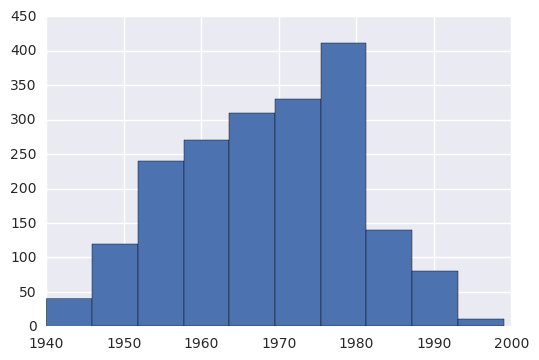

In [93]:
%matplotlib inline
all_asn_data['BirthYear'] = all_asn_data['PatientBirthDate'].map(lambda x: int(str(x)[0:4]))
_ = all_asn_data['BirthYear'].hist(by = all_asn_data['Modality'])

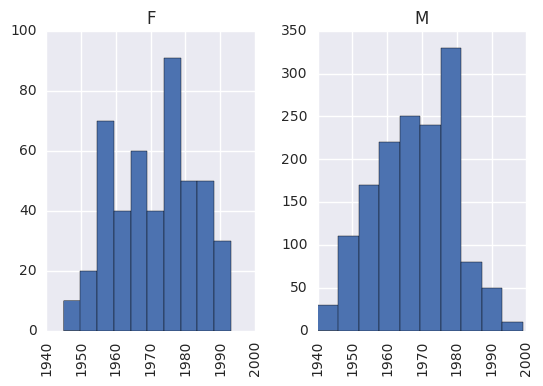

In [101]:
%matplotlib inline
_ = all_asn_data['BirthYear'].hist(by = all_asn_data['PatientSex'])